<a href="https://colab.research.google.com/github/junxnone/examples/blob/master/opencv/rgb2gray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://user-images.githubusercontent.com/2216970/70385817-c1e09d80-19cb-11ea-844b-574a9a6ba799.png)

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def lut(weight):
    lut = []
    for i in range(256):
        lut.append(np.int32(i*weight))
    return np.array(lut)


def rgb2gray(image, type, rlut=None, glut=None, blut=None):
    h, w, c = image.shape
    gray = np.zeros((h,w), dtype=np.uint8)
    for row in range(h):
        for col in range(w):
            r, g, b = np.int32(image[row,col])
            if type == 1:
                y = blut[b] + glut[g] + rlut[r]
            if type == 2:
                y = (max([b, g, r]) + min([b, g,r])) // 2
            if type == 3:
                y = (b+g+r) // 3
            if type == 4:
                y = max([b, g, r])
            if type == 5:
                y = min([b, g, r])
            gray[row, col] = y

    return gray

In [3]:
!wget https://user-images.githubusercontent.com/2216970/70385847-053b0c00-19cc-11ea-8431-179e42ccd7ff.png -O test.png

--2019-12-08 07:46:12--  https://user-images.githubusercontent.com/2216970/70385847-053b0c00-19cc-11ea-8431-179e42ccd7ff.png
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171619 (168K) [image/png]
Saving to: ‘test.png’

test.png            100%[===================>] 167.60K  --.-KB/s    in 0.01s   

2019-12-08 07:46:12 (12.9 MB/s) - ‘test.png’ saved [171619/171619]



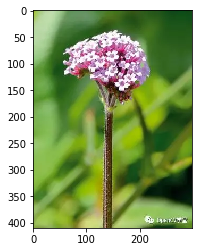

In [4]:
bgr_img = cv2.imread("test.png")
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

# 权重亮度-1

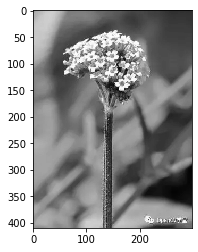

In [5]:
gray1 = rgb2gray(rgb_img, 1, lut(0.299), lut(0.587), lut(0.114))
plt.imshow(gray1, cmap='gray')

# 权重亮度-2

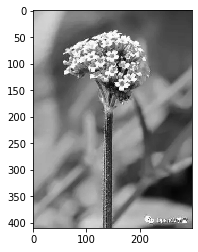

In [6]:
gray2 = rgb2gray(rgb_img, 1, lut(0.21), lut(0.72), lut(0.07))
plt.imshow(gray2, cmap='gray')

# max-min

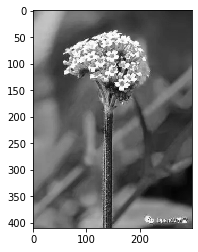

In [7]:
gray3 = rgb2gray(rgb_img, 2)
plt.imshow(gray3, cmap='gray')

# 平均亮度

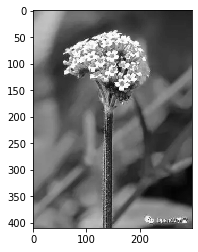

In [8]:
gray4 = rgb2gray(rgb_img, 3)
plt.imshow(gray4, cmap='gray')

# 最大亮度

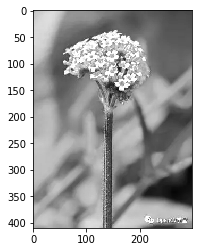

In [9]:
gray5 = rgb2gray(rgb_img, 4)
plt.imshow(gray5, cmap='gray')

# 最小亮度

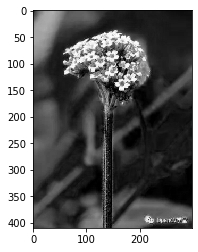

In [10]:
gray6 = rgb2gray(rgb_img, 5)
plt.imshow(gray6, cmap='gray')

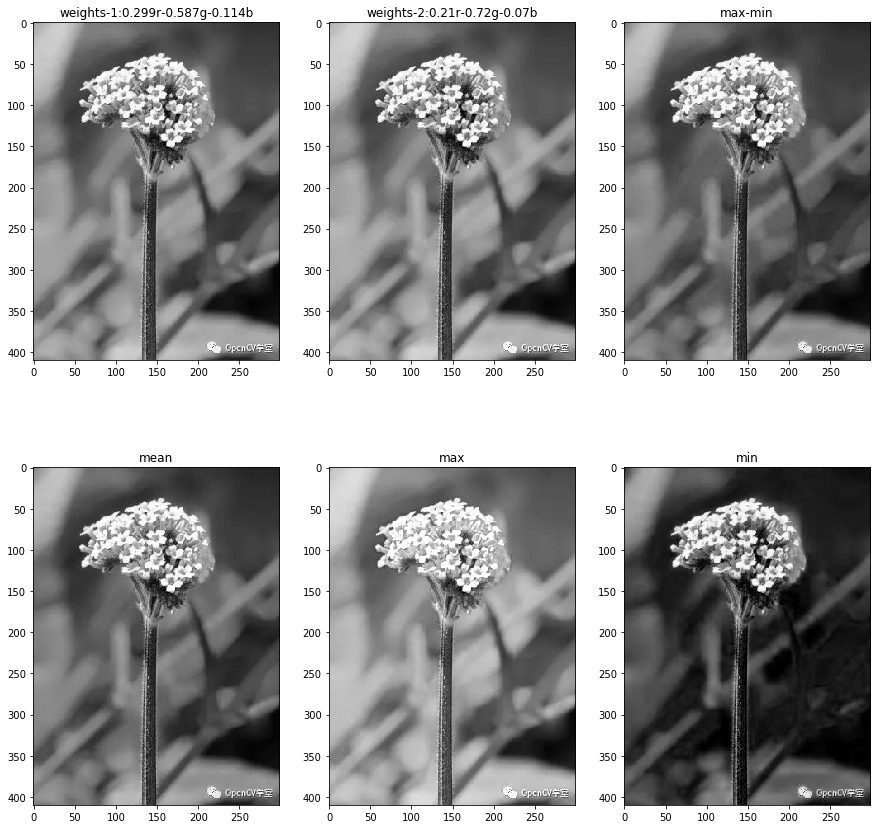

In [11]:
imgs = []
imgs.append(gray1)
imgs.append(gray2)
imgs.append(gray3)
imgs.append(gray4)
imgs.append(gray5)
imgs.append(gray6)
title = ['weights-1:0.299r-0.587g-0.114b', 'weights-2:0.21r-0.72g-0.07b', 'max-min', 'mean', 'max', 'min']

plt.figure(figsize=(15, 15))

for i in range(0,6):
  plt.subplot(2, 3, i+1)
  plt.imshow(imgs[i], cmap="gray")
  plt.title(title[i])
plt.show()